## PCA: Principle Component Analysis
<img src="PCA1.png">

<img src="PCA2.png" width=800>
Reference  
[Sebastian Raschka's blog](https://sebastianraschka.com/Articles/2014_pca_step_by_step.html)

## Review and Definition of PCA  
- Systematied way to transform input features into principal components  
- Use principal componetns as new features  
- PCs are directions in data that maximize variance (minimize information loss) when you project / compress down onto them.  
- More variance of data along a PC, higher that PC is ranked.
- Most variance / most information -> First PC.  
  Second-most variance (without overlappint w/ first PC) -> Second PC.  
- Max number of PCs = number of input features.  
  
## When to use PCA  
- Latent features driving the patterns in data.
- Dimensionality reduction.  
  -> Visualize high-dimensional data.  
  -> Reduce noise.  
  -> Make other algorithms (regression, classification) work better b/c fewer inputs.
  

Reference  
[Udacity Intro to Machine Learning]()

$$  
\overrightarrow{x} = [x_1,x_2,...,x_d], \overrightarrow{x}\in \mathbb{R^d}\\
\overrightarrow{z} = \overrightarrow{x} \times \overrightarrow{W}, \overrightarrow{W}\in \mathbb{R^{d\times k}}, k < d\\
\overrightarrow{z} = [z_1,z_2,...,z_k], \overrightarrow{z}\in \mathbb{R^k}\\
$$  

### Covariance matrix
$$  
\sigma_{j,k} = \frac{1}{n}\sum_{i=1}^{n}(x_j^{(i)}-\mu_j)(x_k^{(i)}-\mu_k)\\
\Sigma = \left[ \begin{array}{cccc}
\sigma_{11} & \sigma_{21}&\ldots& \sigma_{d1}  \\
\sigma_{12} & \sigma_{22}&\ldots& \sigma_{d2} \\
\vdots　&　\ldots　&\ddots &　\vdots　\\
\sigma_{1d} & \sigma_{2d}&\ldots& \sigma_{dd} \\ \end{array} \right]
$$  

### Eigenvectors and eigenvalue
$$  
\Sigma\overrightarrow{v} = \lambda\overrightarrow{v}
$$  

### Variance explained ratio
$$  
\frac{\lambda_j}{\sum_{j=1}^{d}\lambda_j}
$$  

In [321]:
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
import seaborn as sns
from sklearn.cross_validation import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
pd.set_option("display.max_rows", 10)

## Data preparation

In [318]:
df_wine = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data',header=None)

In [319]:
df_wine

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [219]:
df_wine.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,1.938202,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.775035,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,1.000000,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,1.000000,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,2.000000,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,3.000000,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,3.000000,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


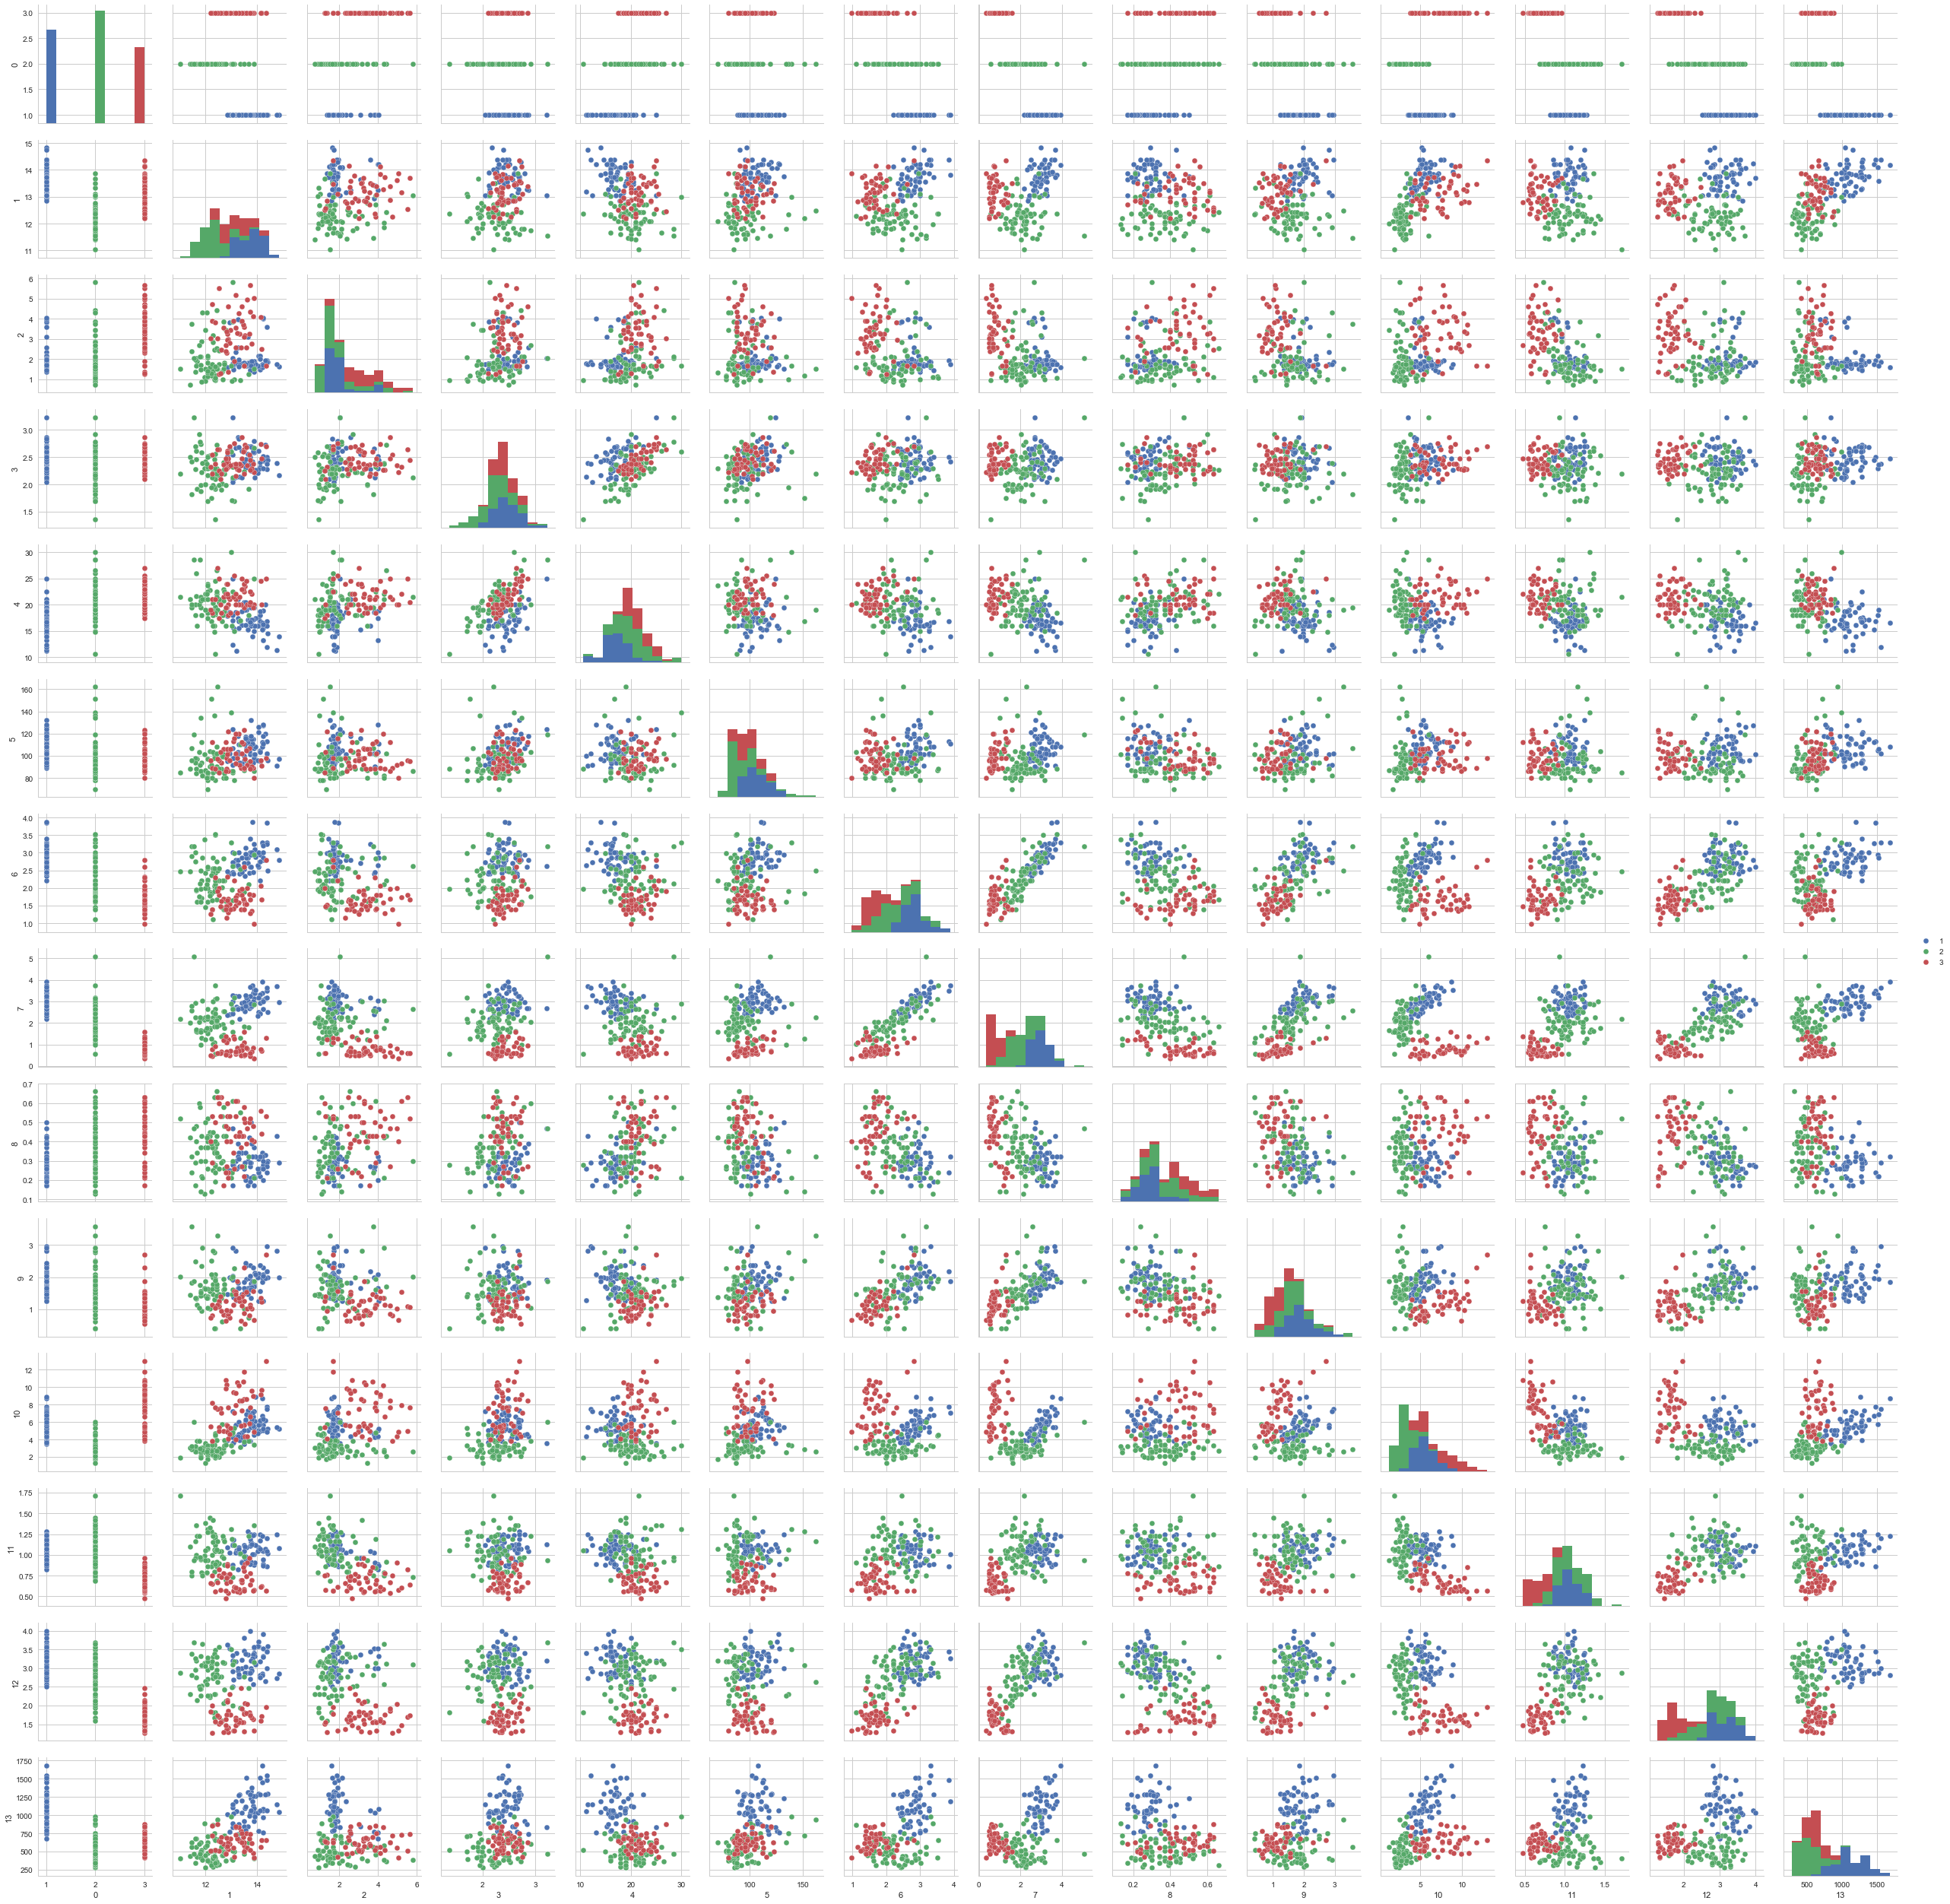

In [175]:
sns.set(style='whitegrid', context='notebook')
sns.pairplot(df_wine, size=2.5, hue=0)
plt.show()

In [220]:
# Objective variable
df_wine.iloc[:,0].values

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3])

In [221]:
X, y = df_wine.iloc[:,1:].values, df_wine.iloc[:,0].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.fit_transform(X_test)

In [276]:
cov_mat = np.cov(X_train_std.T)

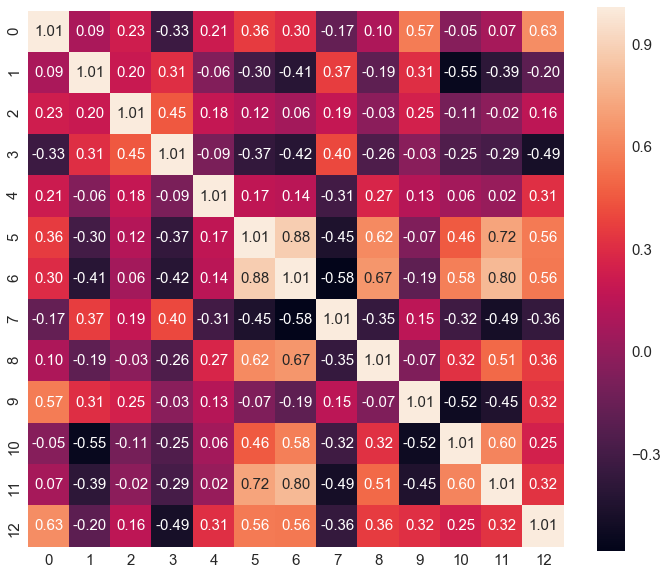

In [277]:
sns.set(font_scale=1.5)
plt.subplots(figsize=(12,10))
hm = sns.heatmap(cov_mat, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size':15})
plt.show()

In [224]:
eigen_vals, eigen_vecs = np.linalg.eig(cov_mat)
print('\nEigenvalues \n%s' % eigen_vals)


Eigenvalues 
[ 4.8923083   2.46635032  1.42809973  1.01233462  0.84906459  0.60181514
  0.52251546  0.08414846  0.33051429  0.29595018  0.16831254  0.21432212
  0.2399553 ]


In [225]:
tot = sum(eigen_vals)
var_exp = [(i / tot) for i in sorted(eigen_vals, reverse=True)]
cum_car_exp = np.cumsum(var_exp)

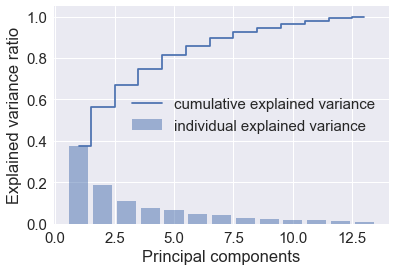

In [226]:
plt.bar(range(1, 14), var_exp, alpha=0.5, align='center', label='individual explained variance')
plt.step(range(1,14), cum_car_exp, where='mid', label='cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.legend(loc='best')
plt.show()

In [227]:
eigen_pairs = [(np.abs(eigen_vals[i]), eigen_vecs[:,i]) for i in range(len(eigen_vals))]
eigen_pairs.sort(reverse=True)

In [228]:
w = np.hstack((eigen_pairs[0][1][:, np.newaxis], eigen_pairs[1][1][:, np.newaxis]))
print('Matrix W:\n', w)

Matrix W:
 [[ 0.14669811  0.50417079]
 [-0.24224554  0.24216889]
 [-0.02993442  0.28698484]
 [-0.25519002 -0.06468718]
 [ 0.12079772  0.22995385]
 [ 0.38934455  0.09363991]
 [ 0.42326486  0.01088622]
 [-0.30634956  0.01870216]
 [ 0.30572219  0.03040352]
 [-0.09869191  0.54527081]
 [ 0.30032535 -0.27924322]
 [ 0.36821154 -0.174365  ]
 [ 0.29259713  0.36315461]]


## PCA + Logistic regression

In [244]:
X_train_std[0].dot(w)

array([ 2.59891628,  0.00484089])

In [245]:
#X_train_pca = X_train_std.dot(w)

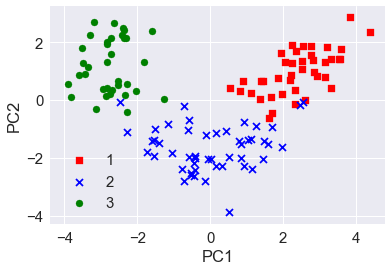

In [278]:
colors = ['r','b','g']
markers = ['s','x','o']

for l, c, m in zip(np.unique(y_train), colors, markers):
    plt.scatter(X_train_std.dot(w)[y_train==l, 0], X_train_std.dot(w)[y_train==l, 1], c=c, label=l, marker=m)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend(loc = 'lower left')
plt.show()

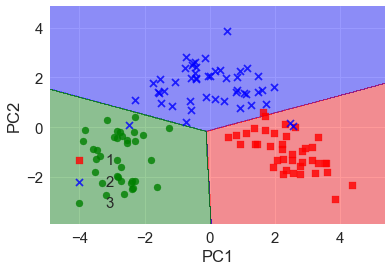

In [284]:
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
from Plot_decision_regions import PlotDecisionRegions

pca = PCA(n_components=2)
lr = LogisticRegression()
X_train_pca = pca.fit_transform(X_train_std)
X_test_pca = pca.transform(X_test_std)
lr.fit(X_train_pca, y_train)
PlotDecisionRegions.plot_decision_regions(X_train_pca, y_train, classifier=lr)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend(loc='lower left')
plt.show()

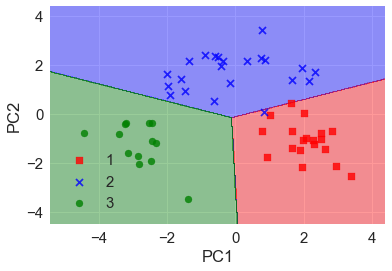

In [285]:
PlotDecisionRegions.plot_decision_regions(X_test_pca, y_test, classifier=lr)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend(loc='lower left')
plt.show()

In [297]:
pc0 = pca.components_[0]
pc1 = pca.components_[1]

In [313]:
feature_names = df_wine.iloc[:,1:].columns
feature_names

Int64Index([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13], dtype='int64')

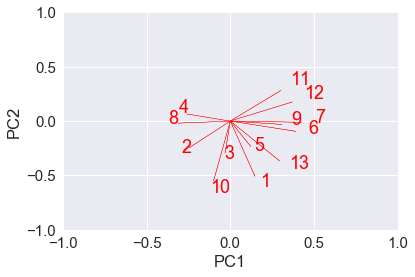

In [316]:
for i in range(pc0.shape[0]):
    plt.arrow(0, 0, pc0[i], pc1[i],color='r')
    plt.text(pc0[i]*1.2, pc1[i]*1.2, feature_names[i],color='r')
plt.xlim(-1,1)
plt.ylim(-1,1)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

In [241]:
pca = PCA(n_components=None)
X_train_pca = pca.fit_transform(X_train_std)
pca.explained_variance_ratio_

array([ 0.37329648,  0.18818926,  0.10896791,  0.07724389,  0.06478595,
        0.04592014,  0.03986936,  0.02521914,  0.02258181,  0.01830924,
        0.01635336,  0.01284271,  0.00642076])

## ROC curve, Confusion matrix

In [265]:
y_train_1 = []
for i in range(len(y_train)):
    if y_train[i] == 1:
        y_train_1.append(1)
    else:
        y_train_1.append(0)

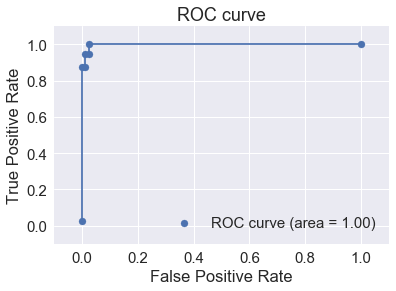

In [270]:
fpr, tpr, thresholds = metrics.roc_curve(y_train_1, lr.predict_proba(X_train_pca)[:,0])
auc = metrics.auc(fpr, tpr)
plt.scatter(fpr, tpr, label='ROC curve (area = %.2f)'%auc)
plt.plot(fpr, tpr)
plt.legend()
#plt.grid()
plt.title('ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.ylim(-0.1,1.1)
plt.xlim(-0.1,1.1)
plt.show()

In [271]:
y_test_1 = []
for i in range(len(y_test)):
    if y_test[i] == 1:
        y_test_1.append(1)
    else:
        y_test_1.append(0)

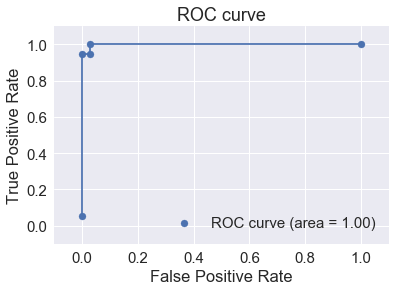

In [272]:
fpr, tpr, thresholds = metrics.roc_curve(y_test_1, lr.predict_proba(X_test_pca)[:,0])
auc = metrics.auc(fpr, tpr)
plt.scatter(fpr, tpr, label='ROC curve (area = %.2f)'%auc)
plt.plot(fpr, tpr)
plt.legend()
plt.title('ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.ylim(-0.1,1.1)
plt.xlim(-0.1,1.1)
#plt.grid()
plt.show()

In [273]:
cm_train = metrics.confusion_matrix(y_train,lr.predict(X_train_pca))
print(cm_train)

[[39  1  0]
 [ 2 46  1]
 [ 0  0 35]]


## Logistic regression

In [274]:
lr = LogisticRegression()
lr.fit(X_train, y_train)
cm_train = metrics.confusion_matrix(y_train,lr.predict(X_train))
print(cm_train)

[[39  1  0]
 [ 0 48  1]
 [ 0  0 35]]


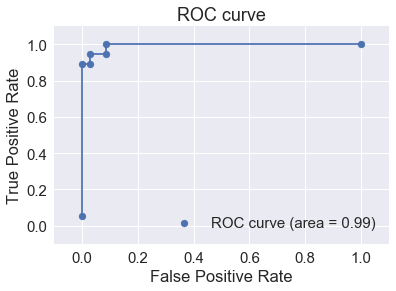

In [275]:
y_test_1 = []
for i in range(len(y_test)):
    if y_test[i] == 1:
        y_test_1.append(1)
    else:
        y_test_1.append(0)
        
fpr, tpr, thresholds = metrics.roc_curve(y_test_1, lr.predict_proba(X_test)[:,0])
auc = metrics.auc(fpr, tpr)
plt.scatter(fpr, tpr, label='ROC curve (area = %.2f)'%auc)
plt.plot(fpr, tpr)
plt.legend()
plt.title('ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.ylim(-0.1,1.1)
plt.xlim(-0.1,1.1)
#plt.grid()
plt.show()